In [12]:
import matplotlib.pyplot as plt
import json

In [13]:
%matplotlib inline

In [14]:
def plot_jsons(json_dir,image_dir,names,titles,height,width,figsize=(10,20)):
    pic_num = len(names)//(height*width)
    for p in range(pic_num):
        fig, axes = plt.subplots(height, width, sharey=True, figsize=figsize, squeeze=False)
        fig.patch.set_alpha(1)
        
        for h in range(height):
            for w in range(width):
                plt_local_num = h * width + w
                name_idx = p * height * width + plt_local_num
                if(name_idx>=len(names)):
                    continue
                name = names[name_idx]
                title = titles[name_idx]
                json_path = json_dir + './' + name

                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']

                x_lim = len(train_loss)
                x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

                ax = axes[h, w]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(x_per5,dev_loss)
                ax.legend(['train','dev'])
                ax.set_title(title)
                ax.grid(True,axis='y')

        image_path = image_dir + './image_{0}'.format(p)
        fig.savefig(image_path)

In [22]:
def plot_jsons_coef(json_dir,image_dir,names,titles,height,width,figsize=(10,20)):
    pic_num = len(names)//(height*width)
    for p in range(pic_num):
        fig, axes = plt.subplots(height, width, sharey=True, figsize=figsize, squeeze=False)
        fig.patch.set_alpha(1)
        
        for h in range(height):
            for w in range(width):
                plt_local_num = h * width + w
                name_idx = p * height * width + plt_local_num
                if(name_idx>=len(names)):
                    continue
                name = names[name_idx]
                title = titles[name_idx]
                json_path = json_dir + './' + name

                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']
                coef = dat['coef']

                x_lim = len(train_loss)
                x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

                ax = axes[h, w]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(x_per5,dev_loss)
                
                ax2 = ax.twinx()
                ax2.plot(x_per5,coef,color='green')
                
                ax.legend(['train','dev'])
                ax.set_title(title)
                ax.grid(True,axis='y')

        image_path = image_dir + './image_{0}'.format(p)
        fig.savefig(image_path)

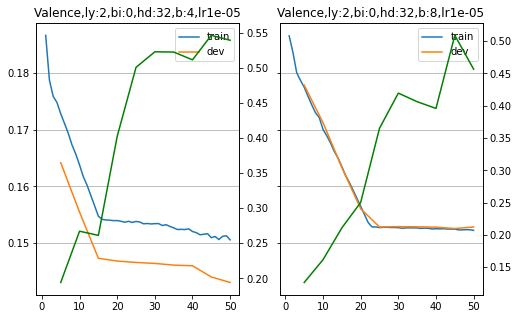

In [23]:
# dat_word_cut_onlyの結果を見る
vad_types = ['Valence']

json_dir = './dat_model_json/dat_word_cut_only/json/'
image_dir = './image/dat_word_cut_only/'

bss = [4,8]
lrs = [0.00001]

hidden_dims = [32]
num_layers = [2]
bis = [0]

names = []
titles = []

for vad_type in vad_types:
    for bi in bis:
        for num_layer in num_layers:
            for hidden_dim in hidden_dims:
                for bs in bss:
                    for lr in lrs:
                        name = "{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}.json".format(\
                                vad_type,num_layer,bi,hidden_dim,bs,lr)
                        title = "{},ly:{},bi:{},hd:{},b:{},lr{}".format(\
                                vad_type,num_layer,bi,hidden_dim,bs,lr)
                        names.append(name)
                        titles.append(title)

plot_jsons_coef(json_dir,image_dir,names,titles,1,2,figsize=(8,5))


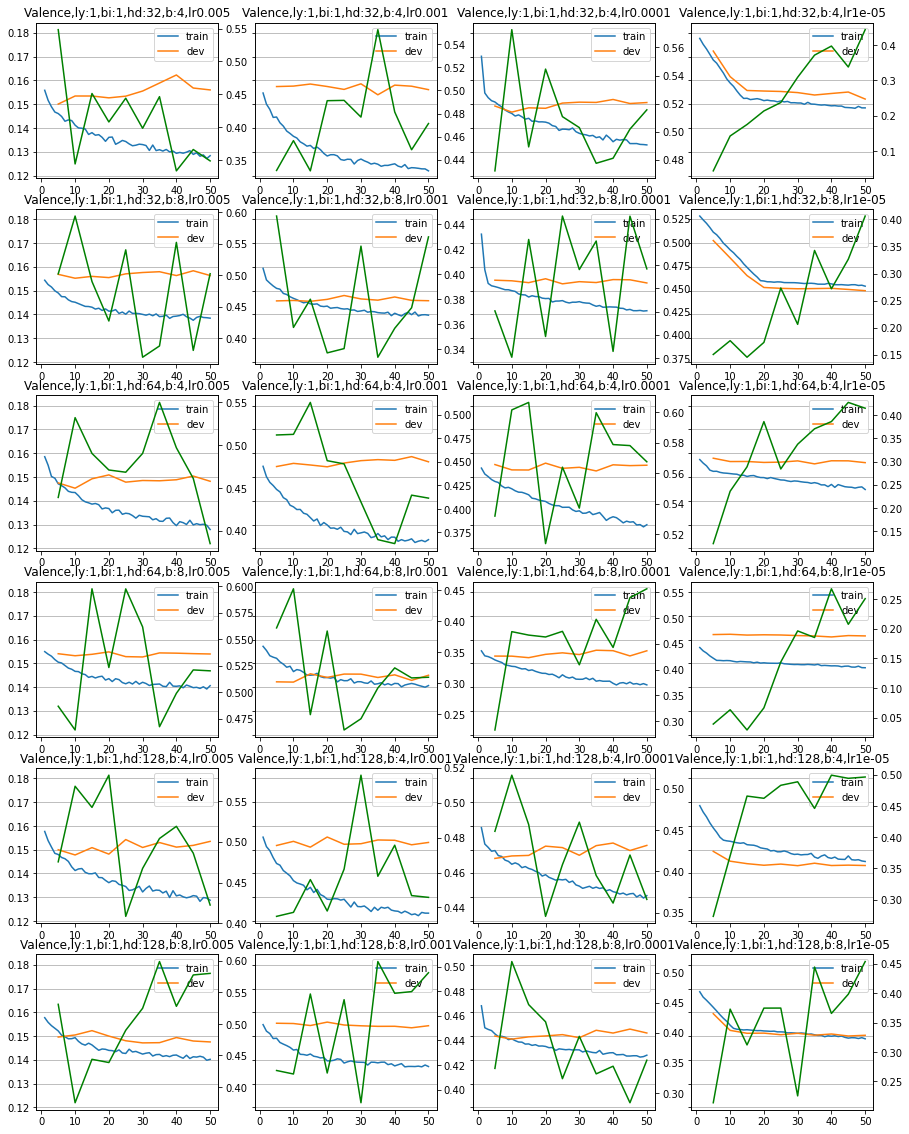

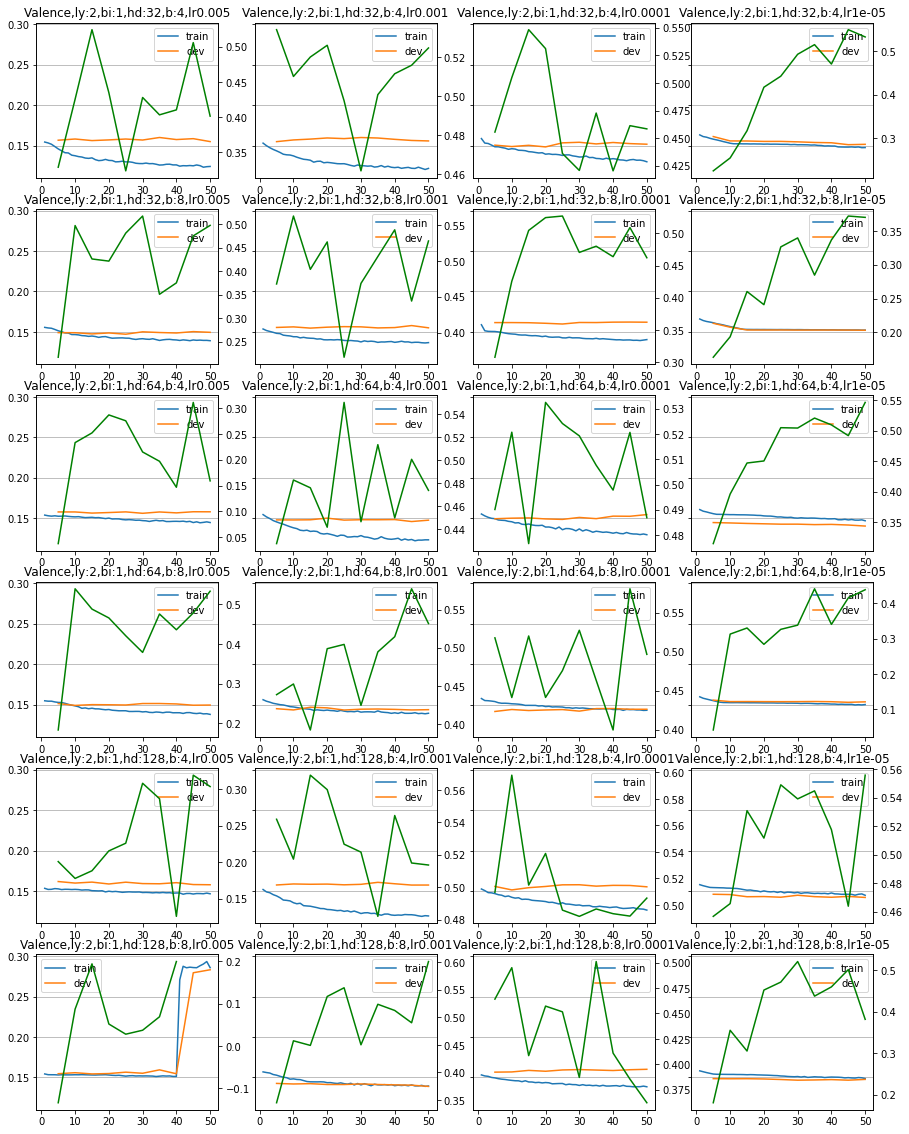

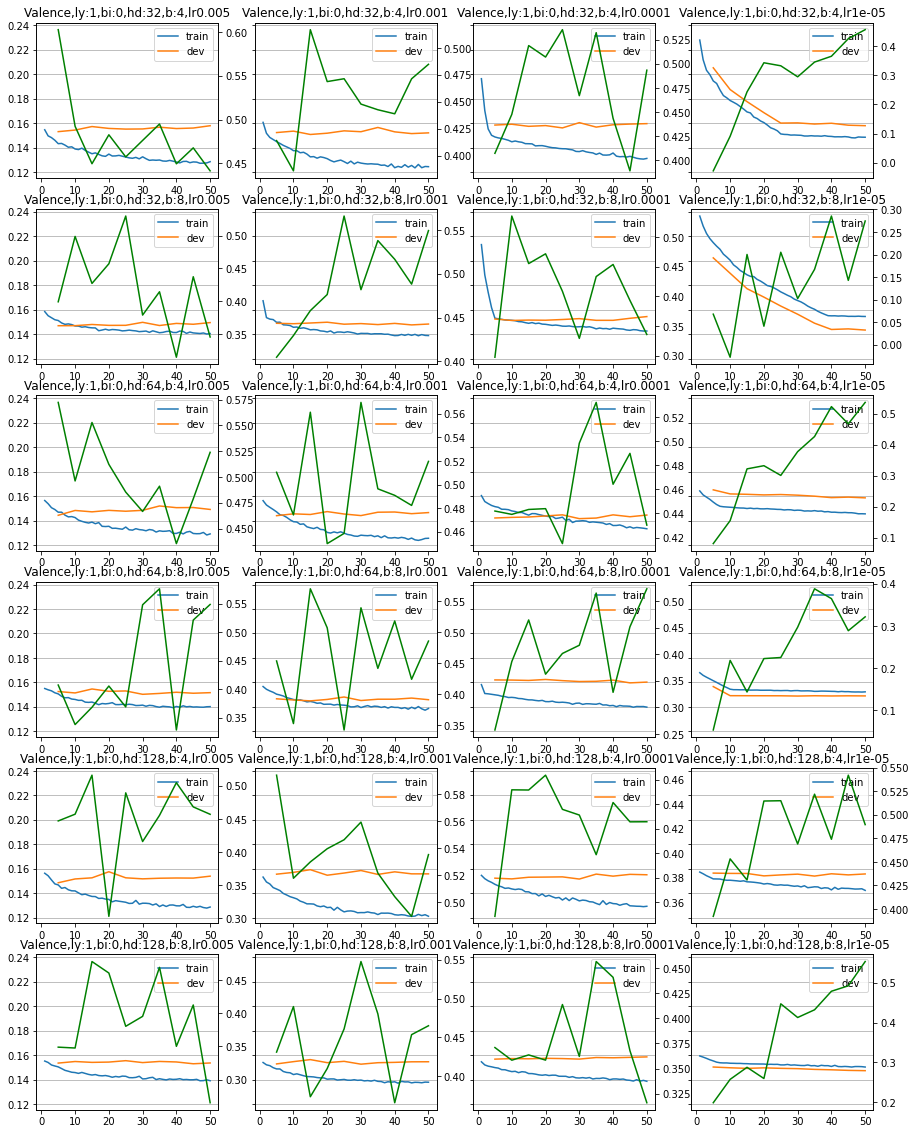

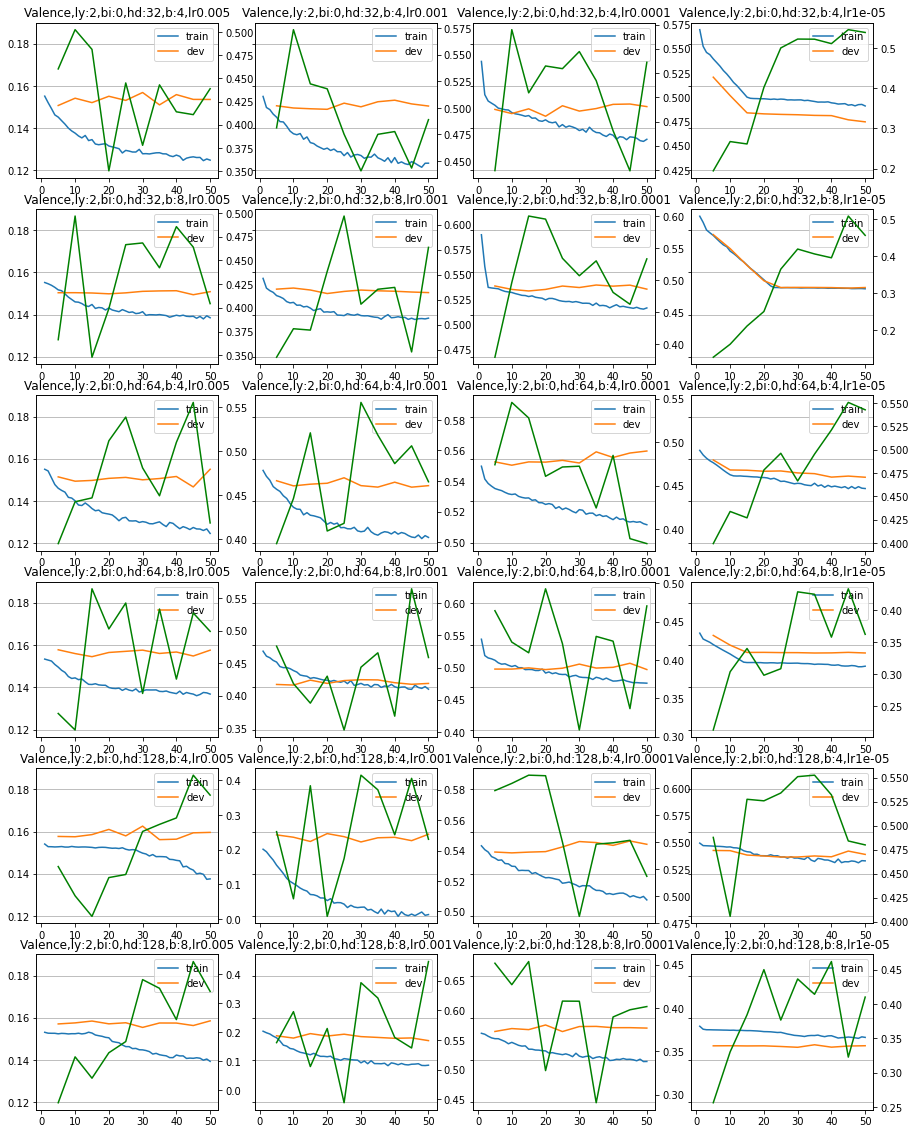

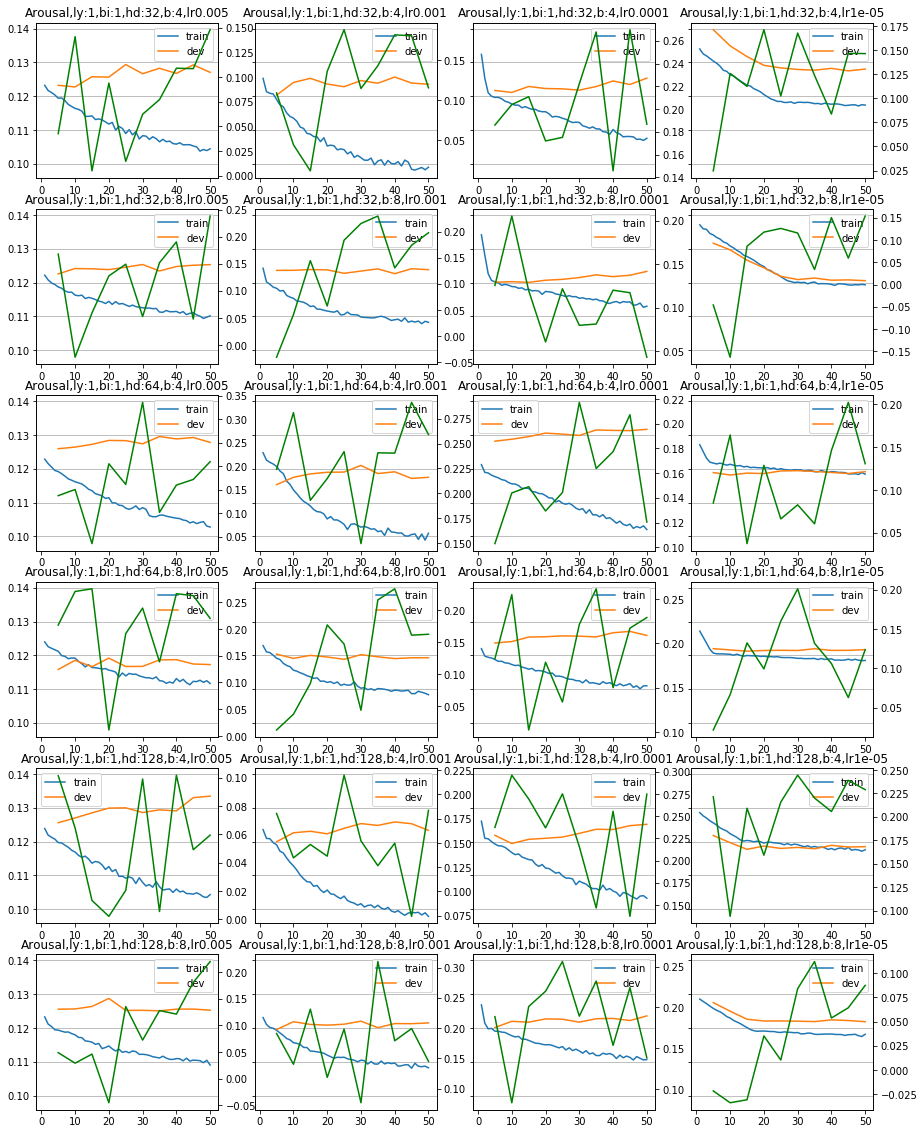

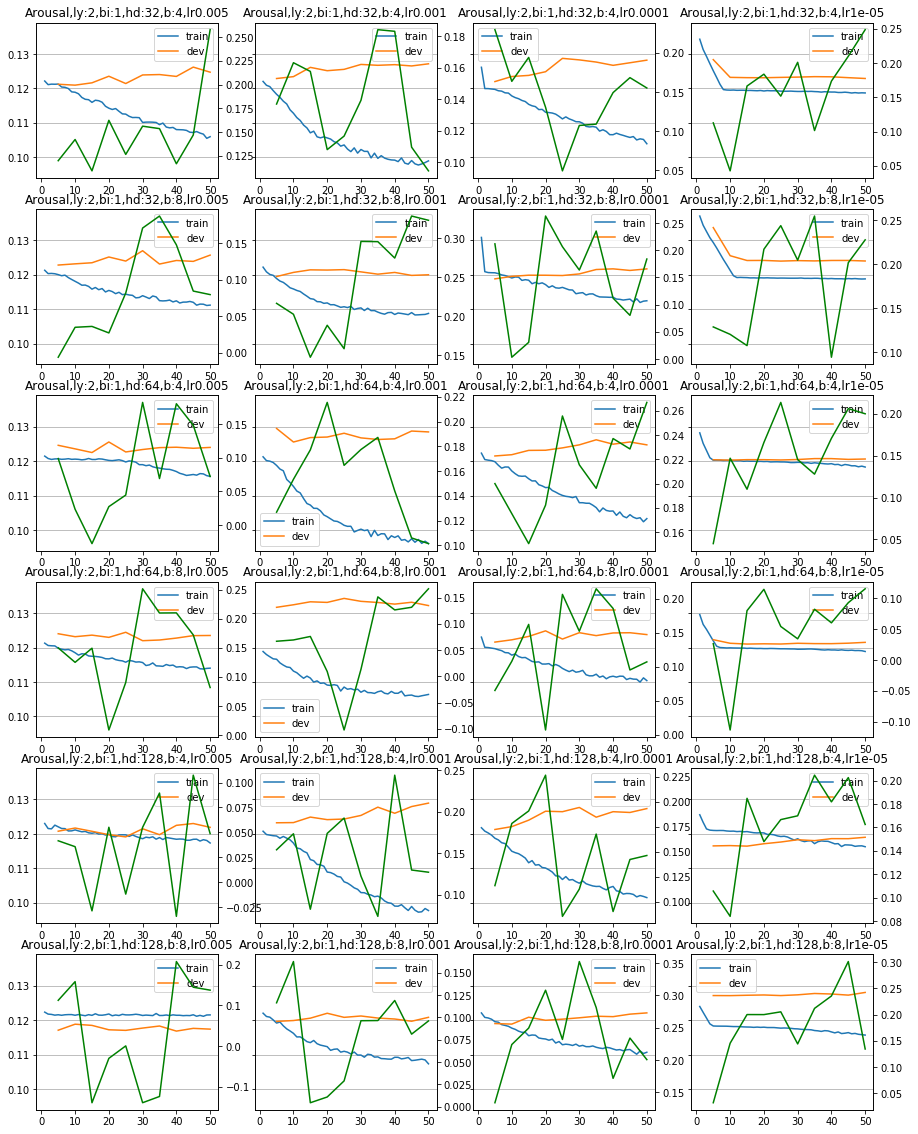

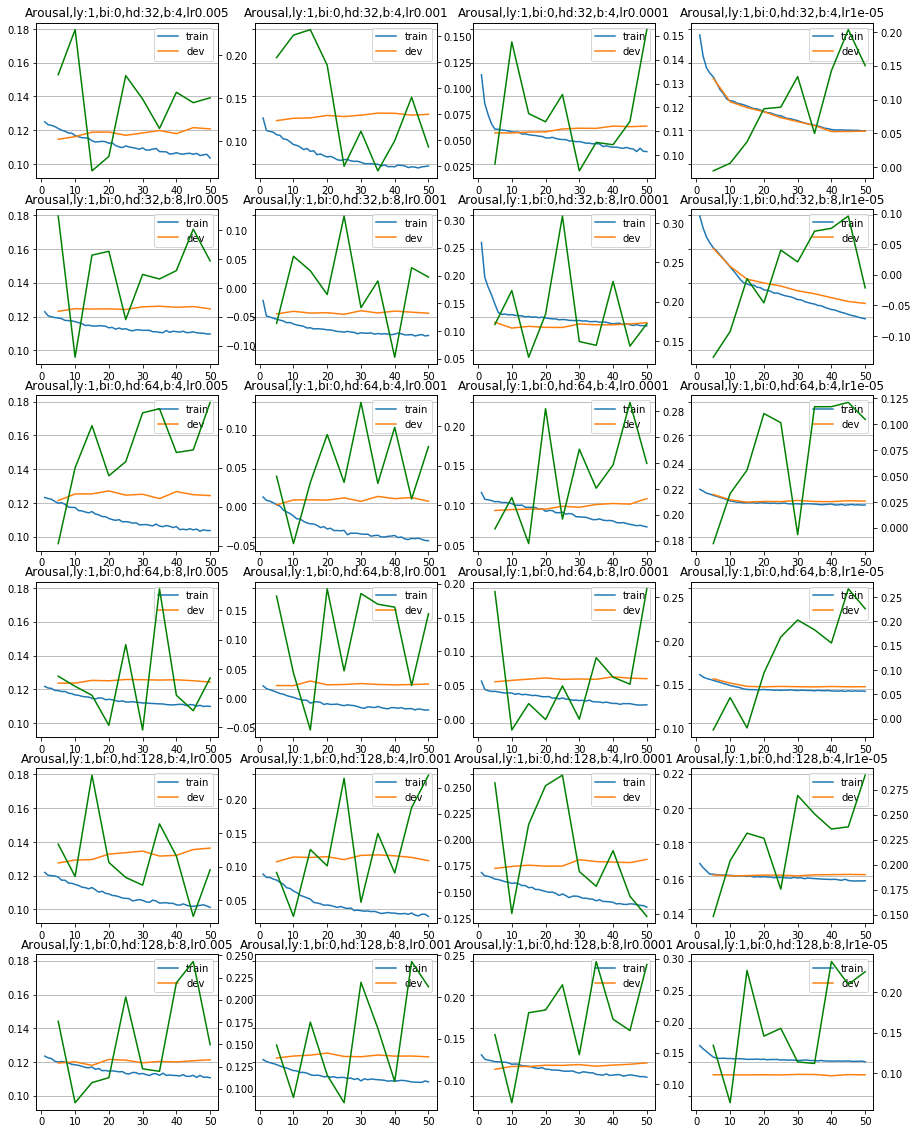

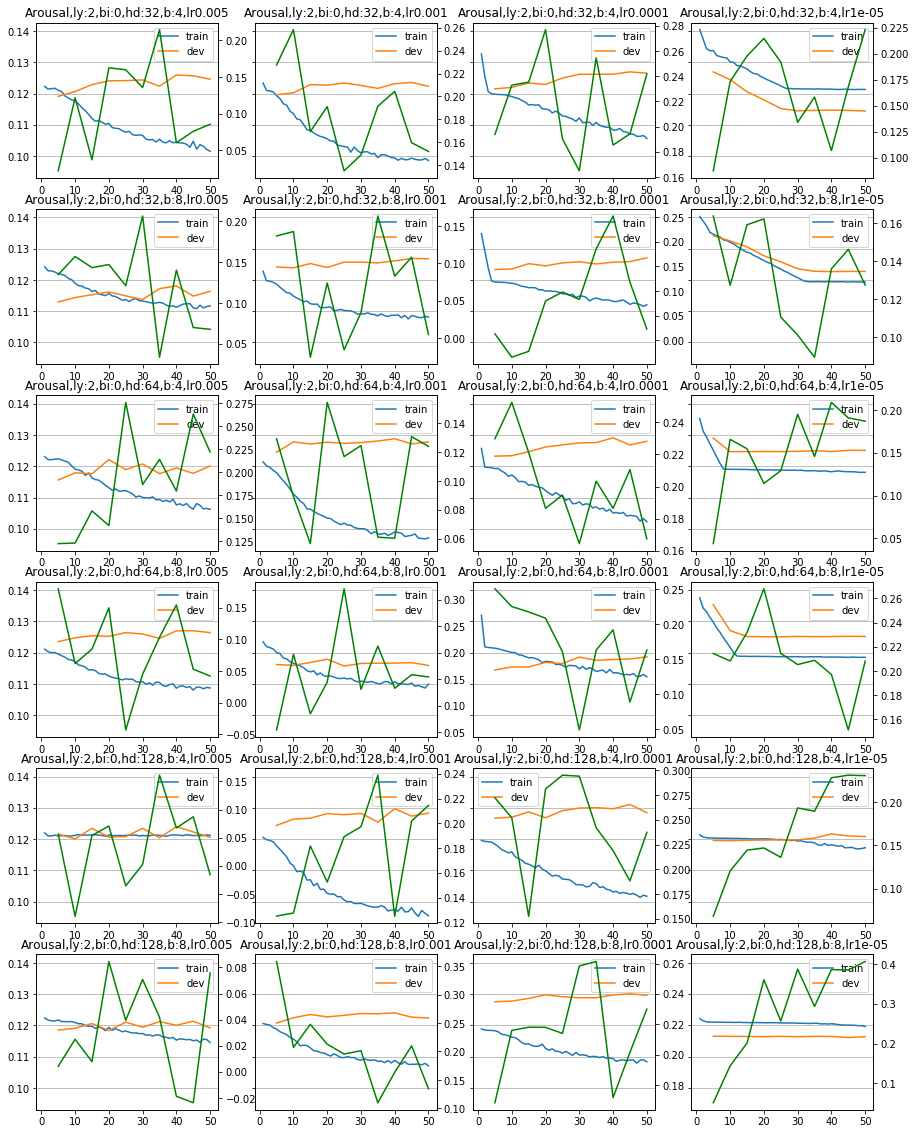

In [24]:
# dat_word_cut_onlyの結果を見る
vad_types = ['Valence','Arousal']

json_dir = './dat_model_json/dat_word_cut_only/json/'
image_dir = './image/dat_word_cut_only/'

bss = [4,8]
lrs = [0.005,0.001,0.0001,0.00001]

hidden_dims = [32,64,128]
num_layers = [1,2]
bis = [1,0]

names = []
titles = []

for vad_type in vad_types:
    for bi in bis:
        for num_layer in num_layers:
            for hidden_dim in hidden_dims:
                for bs in bss:
                    for lr in lrs:
                        name = "{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}.json".format(\
                                vad_type,num_layer,bi,hidden_dim,bs,lr)
                        title = "{},ly:{},bi:{},hd:{},b:{},lr{}".format(\
                                vad_type,num_layer,bi,hidden_dim,bs,lr)
                        names.append(name)
                        titles.append(title)

plot_jsons_coef(json_dir,image_dir,names,titles,6,4,figsize=(15,20))


In [18]:
# # vad_types = ['Valence','Arousal','Dominance']
# vad_types = ['Valence','Arousal']

# json_dir = './dat_model_json/dat_word_cut/json/'
# image_dir = './image/dat_word_cut/'

# hidden_dims = [8,16,32,64,128]
# bss = [4,8,16,32]
# lrs = [0.01,0.005,0.001]

# names = []
# titles = []

# for vad_type in vad_types:
#     for bs in bss:
#         for hidden_dim in hidden_dims:
#             for lr in lrs:
#                 name = "loss_{0}_hidden_dim_{1}_batch_{2}_lr_{3}.json".format(\
#                         vad_type,hidden_dim,bs,lr)
#                 title = "{0},hd:{1},b:{2},lr{3}".format(vad_type,hidden_dim,bs,lr)
#                 names.append(name)
#                 titles.append(title)

# plot_jsons(json_dir,image_dir,names,titles,4,3)


In [1]:
# # vad_types = ['Valence','Arousal','Dominance']
# vad_types = ['Valence','Arousal']

# json_dir = './dat_model_json/dat_word_cut_l1loss/json/'
# image_dir = './image/dat_word_cut_l1loss/'

# hidden_dims = [8,16,32,64,128]
# bss = [4]
# lrs = [0.01,0.005,0.001]

# names = []
# titles = []

# for vad_type in vad_types:
#     for bs in bss:
#         for hidden_dim in hidden_dims:
#             for lr in lrs:
#                 name = "loss_{0}_hidden_dim_{1}_batch_{2}_lr_{3}.json".format(\
#                         vad_type,hidden_dim,bs,lr)
#                 title = "{0},hd:{1},b:{2},lr{3}".format(vad_type,hidden_dim,bs,lr)
#                 names.append(name)
#                 titles.append(title)

# plot_jsons(json_dir,image_dir,names,titles,5,3)


In [40]:
# vad_types = ['Valence','Arousal']

# json_dir = './dat_model_json/dat_word_cut_l1loss_mullayer_bidirectional/json/'
# image_dir = './image/dat_word_cut_l1loss_mullayer/'

# bss = [4,8]
# lrs = [0.005,0.001,0.0001,0.00001]

# hidden_dims = [32,64,128]
# num_layers = [2,4,8]
# bis = [1,0]

# names = []
# titles = []

# for vad_type in vad_types:
#     for bi in bis:
#         for num_layer in num_layers:
#             for hidden_dim in hidden_dims:
#                 for bs in bss:
#                     for lr in lrs:
#                         name = "{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}.json".format(\
#                                 vad_type,num_layer,bi,hidden_dim,bs,lr)
#                         title = "{},ly:{},bi:{},hd:{},b:{},lr{}".format(\
#                                 vad_type,num_layer,bi,hidden_dim,bs,lr)
#                         names.append(name)
#                         titles.append(title)

# plot_jsons(json_dir,image_dir,names,titles,3,3)


In [ ]:
save_dir='./dat_model_json/dat_word_cut_l1loss_mullayer_bidirectional/'

vad_type = 'Arousal'
num_layers = 8
bidirectional = False
bi = 1 if bidirectional else 0
hidden_dim = 64
batch_size = 4
learning_rate = 1e-5
epoch = 100

model_name = '{}./model/{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}_epoch_{}'.format(\
                        save_dir,vad_type,num_layers,bi,hidden_dim,batch_size,learning_rate,epoch)

option = {
    'hidden_size' : hidden_dim,
    'num_layers' : num_layers,
    'bidirectional' : bidirectional
}

y_true_v, y_pred_v = make_pred(option,vad_type,model_name,dat_base_name='./data_preprocessed')

data_types = ['train','dev','test' ]
for data_type in data_types:
    print("{0} : {1}".format(data_type,np.corrcoef(y_true_v[data_type],y_pred_v[data_type])[0,1]))